<a href="https://colab.research.google.com/github/wuhengknife/Deeplearnging_wuenda/blob/main/NeuralStyleTransfer_tf_hub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

In [2]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

In [3]:
cd /content/drive/MyDrive/Deeplearning Assignment By Andrew Ng/04_Convolutional NN/Week4_FaceRecognition And Neutral style transfer /Programming_homework/Neural Style Transfer


/content/drive/MyDrive/Deeplearning Assignment By Andrew Ng/04_Convolutional NN/Week4_FaceRecognition And Neutral style transfer /Programming_homework/Neural Style Transfer


In [6]:
from PIL import Image

(600, 800, 3)

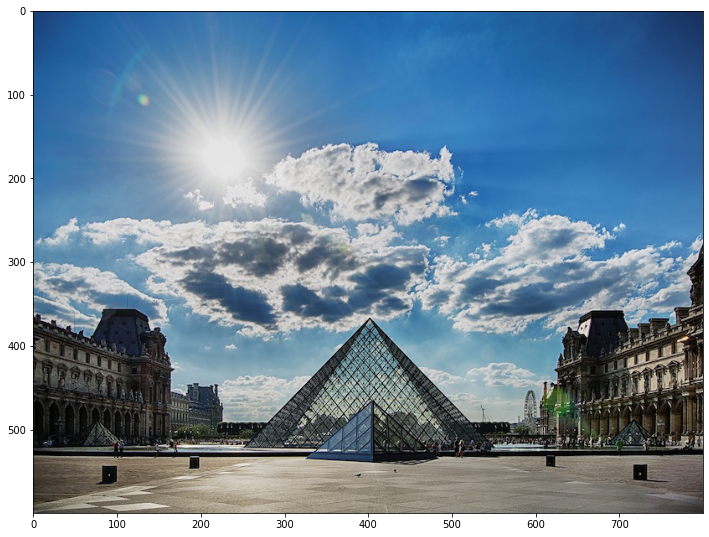

In [42]:
content_image=plt.imread("images/louvre.jpg")
plt.imshow(content_image)
content_image.shape

In [24]:
style_image=plt.imread("images/monet_800600.jpg")
# plt.imshow(style_image)
style_image.shape

(600, 800, 3)

In [13]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [50]:
def load_img(path_to_img):
  max_dim = 480
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  # scale = max_dim / long_dim
  

  # new_shape = tf.cast(shape * scale, tf.int32)

  # img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :] #扩容是必要的
  return img

In [39]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

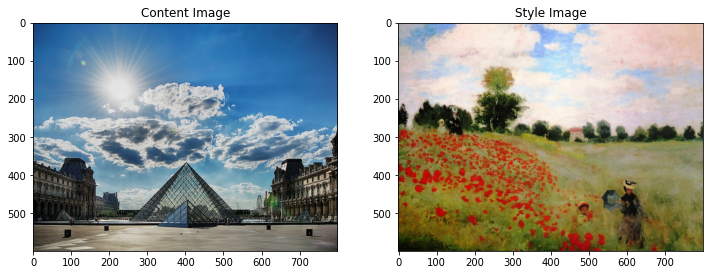

In [51]:
content_path="images/louvre.jpg"
style_path="images/monet_800600.jpg"
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')


In [52]:
print(content_image.shape)
print(style_image.shape)
# content_image

(1, 600, 800, 3)
(1, 600, 800, 3)


In [36]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

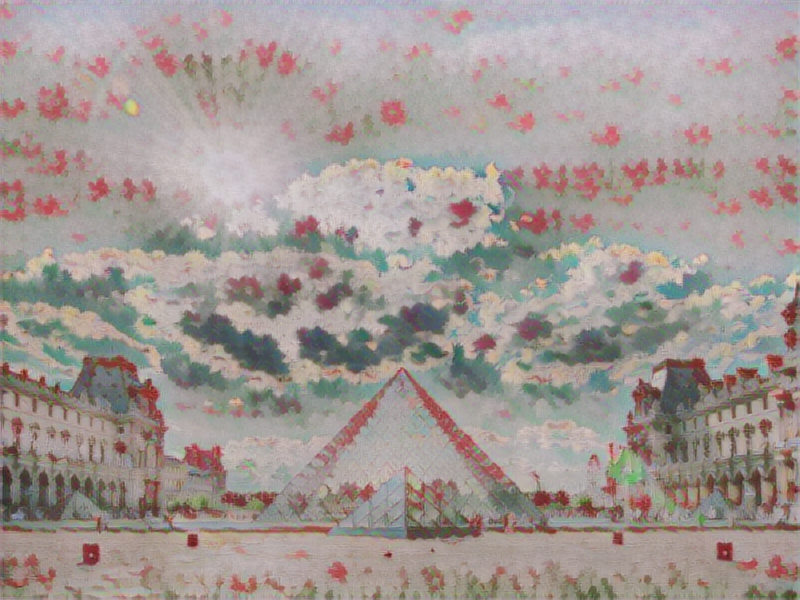

In [53]:

stylized_image=hub_model(tf.constant(content_image),tf.constant(style_image))[0]
tensor_to_image(stylized_image)

array([[[ 24,  59, 115],
        [ 25,  60, 116],
        [ 26,  61, 117],
        ...,
        [ 24,  47,  91],
        [ 24,  47,  91],
        [ 24,  47,  91]],

       [[ 24,  59, 115],
        [ 25,  60, 116],
        [ 26,  61, 117],
        ...,
        [ 24,  46,  93],
        [ 24,  46,  93],
        [ 24,  46,  93]],

       [[ 25,  60, 116],
        [ 25,  60, 116],
        [ 26,  61, 117],
        ...,
        [ 25,  47,  94],
        [ 24,  46,  93],
        [ 24,  46,  93]],

       ...,

       [[ 88,  86,  74],
        [ 96,  94,  82],
        [ 90,  88,  76],
        ...,
        [ 49,  44,  41],
        [ 51,  46,  43],
        [ 50,  45,  42]],

       [[100,  98,  86],
        [105, 103,  91],
        [118, 116, 104],
        ...,
        [ 45,  40,  37],
        [ 47,  42,  39],
        [ 47,  42,  39]],

       [[101,  99,  87],
        [ 86,  84,  72],
        [ 92,  90,  78],
        ...,
        [ 47,  42,  39],
        [ 49,  44,  41],
        [ 48,  43,  40]]